# Assignment - 5

### Part 1: Use a Web API to get URLs for news articles

* Go to https://newsapi.org and create an account and get a key
* Write a function getNews(source) that accepts the name of a sourse, queries the NewsAPI, and returns back a list of URLs with the news stories that appear in that source. 

    For example, the outcome of the command:
    getNews('the-wall-street-journal') can be the following list:

    ['https://www.wsj.com/articles/trump-faces-tensions-at-g-7-summit-1495803166',
     'https://www.wsj.com/articles/gunmen-in-egypt-attack-bus-carrying-coptic-christians-1495796748',
     'https://www.wsj.com/articles/u-k-rolls-up-alleged-accomplices-of-suicide-bomber-1495821597',
     'https://www.wsj.com/articles/u-s-gdp-growth-revised-up-to-1-2-rate-in-first-quarter-1495802143', ....]

* Follow the documentation at https://newsapi.org/#documentation and figure out how to get the list of articles from various news sources. 
* You can get some help by looking at the NewsAPI.ipynb notebook stored under 04-WebAPIs on JupyterHub.

In [49]:
# Import pandas and requests for web apis

import requests
import pandas as pd
import datetime
import json

In [50]:
# set col width to unlimited
pd.set_option('display.max_colwidth', -1)

In [51]:
# Call news api with api key and URL using getNews method
newsapi_key = 'bb6dcc287fef4cb59e2f4fb3e99a4ca3'
endpoint = 'https://newsapi.org/v2/top-headlines'

def getNews(query):
    parameters = {
    'sources': query,
    'apiKey' : newsapi_key
    }
    resp = requests.get(endpoint, params=parameters).json()
    if resp['status'] == 'ok':
        df = pd.DataFrame( resp['articles'] )
        return df['url'].tolist()
    else:
        return None

In [52]:
# Call getNews function with a source name which returns a dataframe of URL and Content

news_urls = getNews('the-wall-street-journal')
if news_urls is not None:
    print(news_urls)
else:
    print("API response invalid")

['https://www.wsj.com/articles/bernie-sanders-outraised-and-lagging-in-polls-plays-the-long-game-11562354157?mod=hp_lead_pos9', 'https://www.wsj.com/articles/analysis-june-jobs-report-weakens-case-for-larger-fed-rate-cut-this-month-11562343047?mod=hp_lead_pos2', 'https://www.wsj.com/articles/trump-says-he-is-considering-an-executive-order-on-census-11562338855?mod=hp_lead_pos6', 'https://www.wsj.com/articles/the-fireworks-over-share-buybacks-are-duds-11562338801?mod=hp_lead_pos10', 'https://www.wsj.com/articles/fast-track-drug-approval-designed-for-emergencies-is-now-routine-11562337924?mod=hp_lead_pos5', 'https://www.wsj.com/articles/u-s-job-creation-bounced-back-in-june-11562330095?mod=hp_lead_pos1', 'https://www.wsj.com/articles/deutsche-banks-investment-banking-chief-to-leave-embattled-lender-11562329912?mod=hp_lead_pos4', 'https://www.wsj.com/articles/debt-collectors-wage-comeback-11562319002?mod=hp_lead_pos3', 'https://www.wsj.com/articles/with-jony-ives-successor-apple-bets-a-pr

### Part 2: Analyze a news article using IBM Watson Natural Language Understanding API

* Use the IBM Watson Natural Language Understanding API, and write a function extractEntities(url) that takes as input a URL, and 
* Returns a list of dictionaries 
    * with every dictionary containing the entity name, 
    * the URL where the entity appeared, 
    * the relevance of the entity to the article, 
    * and the sentiment about the entity. 
   
   For example a dictionary for one entity may look like:
        {
         'entity': 'Donald Trump',
         'url': 'http://www.politico.com/story/2017/05/23/infrastructure-transportation-trump-budget-238741',
         'source': 'politico',
         'relevance': 0.882851,
         'sentiment': -0.25
        }
       

* The function extractEntities should return a list of dictionaries, with each dictionary in the list corresponding to one entity.


In [53]:
# Call watson api to get the sentiment, relevance and other required information

def getWatsonData(url):
    endpoint_watson = "https://gateway.watsonplatform.net/natural-language-understanding/api/v1/analyze"
    params = {
        'version': '2018-11-16',
    }
    headers = { 
        'Content-Type': 'application/json',
    }
    watson_options = {
      "url": url,
      "features": {
        "entities": {
          "sentiment": True,
          "emotion": True,
          "limit": 10
        }
      }
    }
    username = "apikey"
    password = "SvgDnTCp21r_rYrpWPLYulEGR0U1vwPqKduSaEpxJ-P3"

    resp = requests.post(endpoint_watson, 
                         data=json.dumps(watson_options), 
                         headers=headers, 
                         params=params, 
                         auth=(username, password) 
                        )
    return resp.json()

In [54]:
# Extract entities from the watson api to created and return the list of dictionaries

def extractEntities(url, source):
    final_entities = []
    watsonResponse = getWatsonData(url)
    if watsonResponse is not None and len(watsonResponse["entities"]) > 0 :
        for entity in watsonResponse["entities"]:
            output={}
            output["url"] = watsonResponse["retrieved_url"]
            output["source"] = source
            output["entity"] = entity["text"]
            output["sentiment"] =  entity["sentiment"]["score"]
            output["relevance"] = entity["relevance"]
            final_entities.append(output)
    return final_entities

In [55]:
# Test the above method with sample values

url = "https://www.wsj.com/articles/bernie-sanders-outraised-and-lagging-in-polls-plays-the-long-game-11562354157?mod=hp_lead_pos9"
source = 'the-wall-street-journal'
extractEntities(url,source)

[{'url': 'https://www.wsj.com/articles/bernie-sanders-outraised-and-lagging-in-polls-plays-the-long-game-11562354157?mod=hp_lead_pos9',
  'source': 'the-wall-street-journal',
  'entity': 'Sanders',
  'sentiment': -0.272659,
  'relevance': 0.780573},
 {'url': 'https://www.wsj.com/articles/bernie-sanders-outraised-and-lagging-in-polls-plays-the-long-game-11562354157?mod=hp_lead_pos9',
  'source': 'the-wall-street-journal',
  'entity': 'IOWA CITY',
  'sentiment': 0.291822,
  'relevance': 0.731918},
 {'url': 'https://www.wsj.com/articles/bernie-sanders-outraised-and-lagging-in-polls-plays-the-long-game-11562354157?mod=hp_lead_pos9',
  'source': 'the-wall-street-journal',
  'entity': 'senator',
  'sentiment': 0.0,
  'relevance': 0.572161},
 {'url': 'https://www.wsj.com/articles/bernie-sanders-outraised-and-lagging-in-polls-plays-the-long-game-11562354157?mod=hp_lead_pos9',
  'source': 'the-wall-street-journal',
  'entity': 'Vermont',
  'sentiment': 0.0,
  'relevance': 0.507785},
 {'url': 'h

### Part 3: Extract the entities that appear in the news and create a dashboard

* Using the getNews(source) function, get the URLs of the news stories that appear in Wall Street Journal.
* Using the getNews(source) function, get the URLs of the news stories that appear in New York Times.
* Use the extractEntities(url) function to extract the entities that appear in The Wall Street Journal and The New York Times stories.
* Load the extracted entities into a Pandas Dataframe. Remember that if you have a list of dictionaries, you can directly load the list into a dataframe. For example:

        import pandas as pd

        entities = [
         {'entity': 'Donald Trump',
          'relevance': 0.338152,
          'sentiment': 0.0116408,
          'source': 'reuters',
          'url': 'http://www.reuters.com/article/us-religion-ramadan-usa-tillerson-exclsu-idUSKBN18M2IE'},
         {'entity': 'United States',
          'relevance': 0.337925,
          'sentiment': -0.373016,
          'source': 'reuters',
          'url': 'http://www.reuters.com/article/us-religion-ramadan-usa-tillerson-exclsu-idUSKBN18M2IE'},
        {'entity': 'Donald Trump',
          'relevance': 0.89934,
          'sentiment': 0.244183,
          'source': 'associated-press',
          'url': 'https://apnews.com/088c39d02cbc40a9871654c848c2c069'},
         {'entity': 'United States',
          'relevance': 0.303394,
          'sentiment': 0.0691811,
          'source': 'associated-press',
          'url': 'https://apnews.com/088c39d02cbc40a9871654c848c2c069'},
        ]

        df = pd.DataFrame(entities)
        df
        

* Use a the pivot table functionality of Pandas to analyze the relevance and sentiment for the entities being discussed in the news, broken down by source.
* For relevance: As rows of the pivot table keep the entity names, and as columns the sources. As values for the cells put the sum of the relevance scores of the news articles for that entity. This value (sum of relevance) will show how prominently this entity is in the news.
* For sentiment: As rows of the pivot table keep the entity names, and as columns the sources. As values for the cells put the average score for sentiment of the news articles for that entity.
* Use the dropna function of Pandas, to eliminate from the pivot tables the rows/entities that are discussed in only one of the two news sources. (The dropna() function will remove the rows that contain a NaN value.)
* Use the pivot tables that you created above and use the plot function to create two bar plots:
* First plot should show the entities on the x-axis and the total relevance score for that entity on the y-axis, broken down by source.
* Second plot should how the showing the average sentiment for each entity, again broken down by source. 

In [56]:
# Call extract entities method to get the list of dicitonaries of entities into a dataframe

sources=['the-wall-street-journal','the-new-york-times']
df=pd.DataFrame()
for source in sources:
    for url in getNews(source):
        df = df.append(pd.DataFrame(extractEntities(url, source.replace("-"," ").title())))
df = df.reset_index(drop=True)

In [57]:
# Display data in dataframe
df

,entity,relevance,sentiment,source,url
0,Sanders,0.780573,-0.272659,The Wall Street Journal,https://www.wsj.com/articles/bernie-sanders-outraised-and-lagging-in-polls-plays-the-long-game-11562354157?mod=hp_lead_pos9
1,IOWA CITY,0.731918,0.291822,The Wall Street Journal,https://www.wsj.com/articles/bernie-sanders-outraised-and-lagging-in-polls-plays-the-long-game-11562354157?mod=hp_lead_pos9
2,senator,0.572161,0.000000,The Wall Street Journal,https://www.wsj.com/articles/bernie-sanders-outraised-and-lagging-in-polls-plays-the-long-game-11562354157?mod=hp_lead_pos9
3,Vermont,0.507785,0.000000,The Wall Street Journal,https://www.wsj.com/articles/bernie-sanders-outraised-and-lagging-in-polls-plays-the-long-game-11562354157?mod=hp_lead_pos9
4,eight months,0.507785,0.000000,The Wall Street Journal,https://www.wsj.com/articles/bernie-sanders-outraised-and-lagging-in-polls-plays-the-long-game-11562354157?mod=hp_lead_pos9
5,Federal Reserve,0.685079,0.301439,The Wall Street Journal,https://www.wsj.com/articles/analysis-june-jobs-report-weakens-case-for-larger-fed-rate-cut-this-month-11562343047?mod=hp_lead_pos2
6,U.S.,0.368429,-0.583925,The Wall Street Journal,https://www.wsj.com/articles/analysis-june-jobs-report-weakens-case-for-larger-fed-rate-cut-this-month-11562343047?mod=hp_lead_pos2
7,President Trump,0.902399,0.000000,The Wall Street Journal,https://www.wsj.com/articles/trump-says-he-is-considering-an-executive-order-on-census-11562338855?mod=hp_lead_pos6
8,Trump,0.784420,0.000000,The Wall Street Journal,https://www.wsj.com/articles/trump-says-he-is-considering-an-executive-order-on-census-11562338855?mod=hp_lead_pos6
9,Justice Department,0.468611,0.000000,The Wall Street Journal,https://www.wsj.com/articles/trump-says-he-is-considering-an-executive-order-on-census-11562338855?mod=hp_lead_pos6


## Total relevance score for an entity broken down by source

In [58]:
# Pivot the dataframe for total sum of relevance based on source and drop NaN values

pivot_relevance = pd.pivot_table(
    data = df,
    index='entity',
    columns = 'source', 
    values = 'relevance',
    aggfunc = 'sum'
).dropna()
pivot_relevance

source,The New York Times,The Wall Street Journal
entity,,
Federal Reserve,0.787003,0.685079
Justice Department,0.566093,0.468611
President Trump,0.921618,0.902399
executive,0.585378,0.378475


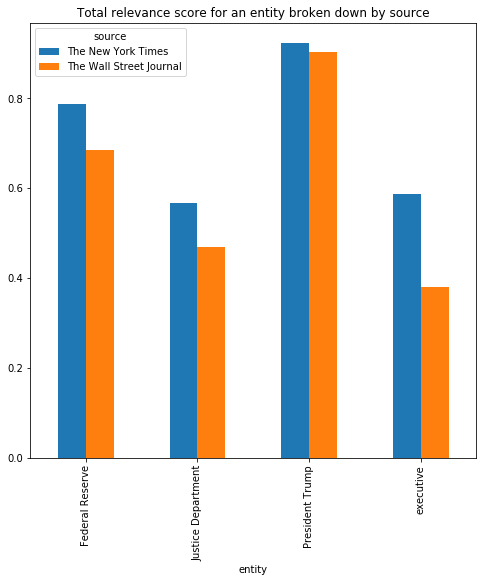

In [59]:
# Plot Relevance

if len(pivot_relevance.index) > 0:
    pivot_relevance.plot(kind='bar',figsize=(8,8),title="Total relevance score for an entity broken down by source")
else:
    print("All data dropped because of removing NaN for Relevance data")

## Average sentiment for each entity broken down by source

In [60]:
# Pivot the dataframe for average sentiment based on source and drop NaN values

pivot_sentiment = pd.pivot_table(
    data = df,
    index='entity',
    columns = 'source', 
    values = 'sentiment',
    aggfunc = 'mean'
).dropna()
pivot_sentiment

source,The New York Times,The Wall Street Journal
entity,,
Federal Reserve,-0.662175,0.301439
Justice Department,0.000000,0.000000
President Trump,0.201628,0.000000
executive,-0.213448,0.000000


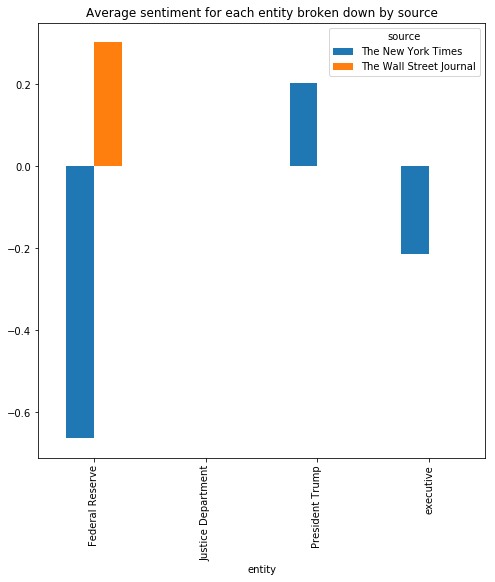

In [61]:
# Plot Sentiment

if len(pivot_relevance.index) > 0:
    pivot_sentiment.plot(kind='bar',figsize=(8,8),title="Average sentiment for each entity broken down by source")
else:
    print("All data dropped because of removing NaN for Sentiment data")